In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [5]:
#reading cleaned and sorted csvs
bottom= pd.read_csv("FinalBottom20.csv")
top= pd.read_csv("FinalTop20.csv")

#reading cleaned population data 
cleaned_pop_df = pd.read_csv("../CleanedData/cleaned_population.csv")

In [6]:
#finding the bottom 20 cities from the dataframe
df11 = cleaned_pop_df.iloc[76, :] #Columbus
df22 = cleaned_pop_df.iloc[163, :]#Midland
df33 = cleaned_pop_df.iloc[121, :]#Fayetteville
df44 = cleaned_pop_df.iloc[11, :]#Tempe
df55 = cleaned_pop_df.iloc[10, :]#Surprise
df66 = cleaned_pop_df.iloc[21, :]#Fremont
df77 = cleaned_pop_df.iloc[32, :]#Moreno Valley
df88 = cleaned_pop_df.iloc[109, :]#North Las Vegas
df99 = cleaned_pop_df.iloc[150, :]#Denton
df100 = cleaned_pop_df.iloc[84, :]#Indianapolis
df110 = cleaned_pop_df.iloc[106, :]#Omaha
df120 = cleaned_pop_df.iloc[136, :]#Pittsburgh
df130 = cleaned_pop_df.iloc[171, :]#Newport News
df140 = cleaned_pop_df.iloc[35, :]#Ontario
df150 = cleaned_pop_df.iloc[131, :]#Tulsa
df160 = cleaned_pop_df.iloc[71, :]#Port Saint Lucie
df170 = cleaned_pop_df.iloc[103, :]#Saint Louis
df180 = cleaned_pop_df.iloc[130, :]#Oklahoma City
df190 = cleaned_pop_df.iloc[143, :]#Murfreesboro
df200 = cleaned_pop_df.iloc[118, :]#Yonkers

#converting dfs into data frames and swaping row and column position
df11 = pd.DataFrame(df11)
df1 = df11.transpose()
df22 = pd.DataFrame(df22)
df2 = df22.transpose()
df33 = pd.DataFrame(df33)
df3 = df33.transpose()
df44 = pd.DataFrame(df44)
df4 = df44.transpose()
df55 = pd.DataFrame(df55)
df5 = df55.transpose()
df66 = pd.DataFrame(df66)
df6 = df66.transpose()
df77 = pd.DataFrame(df77)
df7 = df77.transpose()
df88 = pd.DataFrame(df88)
df8 = df88.transpose()
df99 = pd.DataFrame(df99)
df9 = df99.transpose()
df100 = pd.DataFrame(df100)
df10 = df100.transpose()
df110 = pd.DataFrame(df110)
df11 = df110.transpose()
df120 = pd.DataFrame(df120)
df12 = df120.transpose()
df130 = pd.DataFrame(df130)
df13 = df130.transpose()
df140 = pd.DataFrame(df140)
df14 = df140.transpose()
df150 = pd.DataFrame(df150)
df15 = df150.transpose()
df160 = pd.DataFrame(df160)
df16 = df160.transpose()
df170 = pd.DataFrame(df170)
df17 = df170.transpose()
df180 = pd.DataFrame(df180)
df18 = df180.transpose()
df190 = pd.DataFrame(df190)
df19 = df190.transpose()
df200 = pd.DataFrame(df200)
df20 = df200.transpose()

#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
Pbottom_df = pd.concat(frames).reset_index(drop=True)

#calculating changing rate in population from 2018 to 2019
Pbottom_df['Pop2018-2019'] = ''
for row in Pbottom_df:
    rate1819 = ((Pbottom_df['2019 Population']- Pbottom_df['2018 Population'])/(Pbottom_df['2019 Population']))*100
    Pbottom_df['Pop2018-2019'] = rate1819

#calculating changing rate in population from 2019 to 2020 
Pbottom_df = Pbottom_df.replace(',','', regex=True)
Pbottom_df['2020 Population'] = pd.to_numeric(Pbottom_df['2020 Population'])
Pbottom_df['Pop2019-2020'] = ''
for row in Pbottom_df:
    rate1920 = ((Pbottom_df['2020 Population']-Pbottom_df['2019 Population'])/(Pbottom_df['2020 Population']))*100
    Pbottom_df['Pop2019-2020'] = rate1920

#dropping unwanted columns 
Pbottom_df.drop(Pbottom_df.iloc[:, 3:6], inplace = True, axis = 1)
del Pbottom_df["Unnamed: 0"]
Pbottom_df

#adding housing price rates data
Pbottom_df["Housing2018-2019"] = bottom["2018-2019 changing rate"]
Pbottom_df["Housing2019-2020"] = bottom["2019-2020 changing rate"]

#making new dfs sorted by years 
#2018-2019
Bbottom1819 =Pbottom_df.copy()
del Bbottom1819["Pop2019-2020"]
del Bbottom1819["Housing2019-2020"]

#2019-2020
Bbottom1920 =Pbottom_df.copy()
del Bbottom1920["Pop2018-2019"]
del Bbottom1920["Housing2018-2019"]



In [7]:
#finding the Top20 cities from the dataframe
df11 = cleaned_pop_df.iloc[168, :] #Salt Lake City
df22 = cleaned_pop_df.iloc[64, :]#Hialeah
df33 = cleaned_pop_df.iloc[111, :]#Jersey City
df44 = cleaned_pop_df.iloc[27, :]#Irvine
df55 = cleaned_pop_df.iloc[169, :]#Alexandria
df66 = cleaned_pop_df.iloc[175, :]#Bellevue
df77 = cleaned_pop_df.iloc[154, :]#Garland
df88 = cleaned_pop_df.iloc[5, :]#Glendale
df99 = cleaned_pop_df.iloc[140, :]#Clarksville
df100 = cleaned_pop_df.iloc[74, :]#Tampa
df110 = cleaned_pop_df.iloc[67, :]#Miami
df120 = cleaned_pop_df.iloc[149, :]#Dallas
df130 = cleaned_pop_df.iloc[85, :]#Des Moines
df140 = cleaned_pop_df.iloc[167, :]#Waco
df150 = cleaned_pop_df.iloc[176, :]#Seattle
df160 = cleaned_pop_df.iloc[94, :]#Boston
df170 = cleaned_pop_df.iloc[157, :]#Irving
df180 = cleaned_pop_df.iloc[134, :]#Salem
df190 = cleaned_pop_df.iloc[132, :]#Eugene
df200 = cleaned_pop_df.iloc[72, :]#Saint Petersburg

#converting dfs into data frames and swaping row and column position
df11 = pd.DataFrame(df11)
df1 = df11.transpose()
df22 = pd.DataFrame(df22)
df2 = df22.transpose()
df33 = pd.DataFrame(df33)
df3 = df33.transpose()
df44 = pd.DataFrame(df44)
df4 = df44.transpose()
df55 = pd.DataFrame(df55)
df5 = df55.transpose()
df66 = pd.DataFrame(df66)
df6 = df66.transpose()
df77 = pd.DataFrame(df77)
df7 = df77.transpose()
df88 = pd.DataFrame(df88)
df8 = df88.transpose()
df99 = pd.DataFrame(df99)
df9 = df99.transpose()
df100 = pd.DataFrame(df100)
df10 = df100.transpose()
df110 = pd.DataFrame(df110)
df11 = df110.transpose()
df120 = pd.DataFrame(df120)
df12 = df120.transpose()
df130 = pd.DataFrame(df130)
df13 = df130.transpose()
df140 = pd.DataFrame(df140)
df14 = df140.transpose()
df150 = pd.DataFrame(df150)
df15 = df150.transpose()
df160 = pd.DataFrame(df160)
df16 = df160.transpose()
df170 = pd.DataFrame(df170)
df17 = df170.transpose()
df180 = pd.DataFrame(df180)
df18 = df180.transpose()
df190 = pd.DataFrame(df190)
df19 = df190.transpose()
df200 = pd.DataFrame(df200)
df20 = df200.transpose()

#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
Ptop_df = pd.concat(frames).reset_index(drop=True)

#calculating changing rate in population from 2018 to 2019
Ptop_df['Pop2018-2019'] = ''
for row in Ptop_df:
    rate1819 = ((Ptop_df['2019 Population']- Ptop_df['2018 Population'])/(Ptop_df['2019 Population']))*100
    Ptop_df['Pop2018-2019'] = rate1819

#calculating changing rate in population from 2019 to 2020 
Ptop_df = Ptop_df.replace(',','', regex=True)
Ptop_df['2020 Population'] = pd.to_numeric(Ptop_df['2020 Population'])
Ptop_df['Pop2019-2020'] = ''
for row in Ptop_df:
    rate1920 = ((Ptop_df['2020 Population']-Ptop_df['2019 Population'])/(Ptop_df['2020 Population']))*100
    Ptop_df['Pop2019-2020'] = rate1920

#dropping unwanted columns 
Ptop_df.drop(Ptop_df.iloc[:, 3:6], inplace = True, axis = 1)
del Ptop_df["Unnamed: 0"]

#adding housing price rates data
Ptop_df["Housing2018-2019"] = top["2018-2019 changing rate"]
Ptop_df["Housing2019-2020"] = top["2019-2020 changing rate"]

#making new dfs sorted by years 
#2018-2019
Ptop1819 =Ptop_df.copy()
del Ptop1819["Pop2019-2020"]
del Ptop1819["Housing2019-2020"]

#2019-2020
Ptop1920 =Ptop_df.copy()
del Ptop1920["Pop2018-2019"]
del Ptop1920["Housing2018-2019"]

<IPython.core.display.Javascript object>


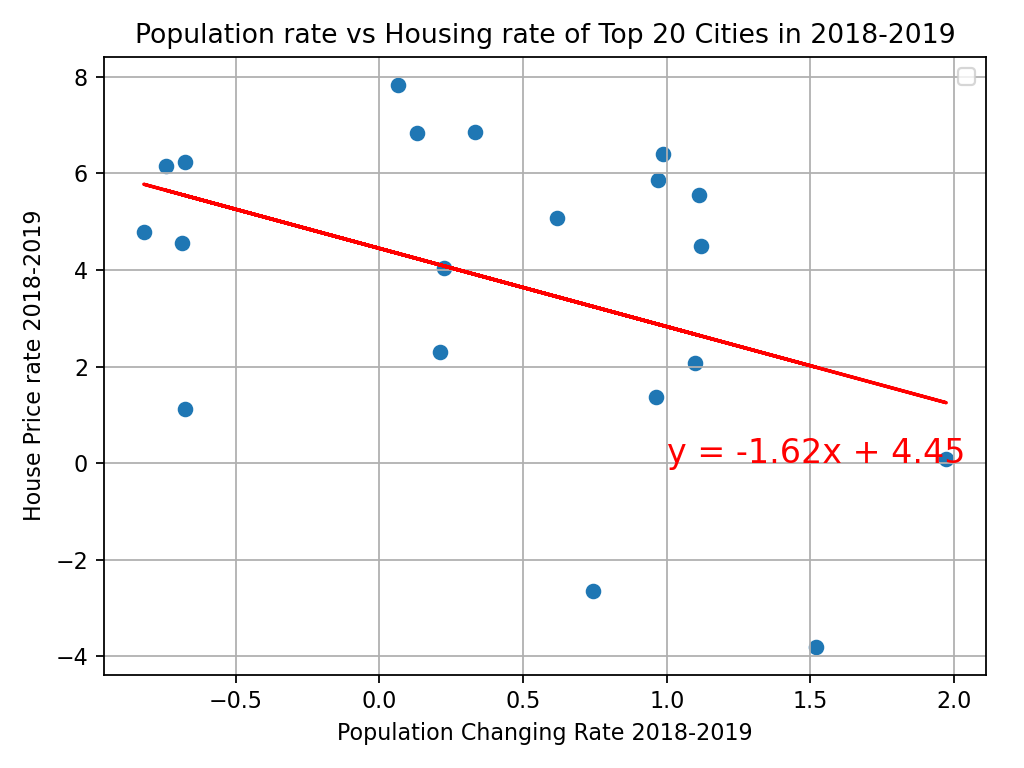

No handles with labels found to put in legend.


The r-value is: 0.17339584131460198.
The correlation is -0.42


In [10]:
#plotting bar graph of top 20 Cities' pop rate vs housing rate in 2018-2019
%matplotlib notebook
fig, ax=plt.subplots(1)
x_values = Ptop1819["Pop2018-2019"]
y_values = Ptop1819["Housing2018-2019"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')

plt.title("Population rate vs Housing rate of Top 20 Cities in 2018-2019")
plt.xlabel("Population Changing Rate 2018-2019")
plt.ylabel("House Price rate 2018-2019")
plt.annotate(line_eq,(1,0), fontsize=15,color="red")
plt.legend(loc = 'best')
plt.tight_layout()
plt.savefig('../Output/Population rate vs Housing rate of Top 20 Cities in 2018-2019.png')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


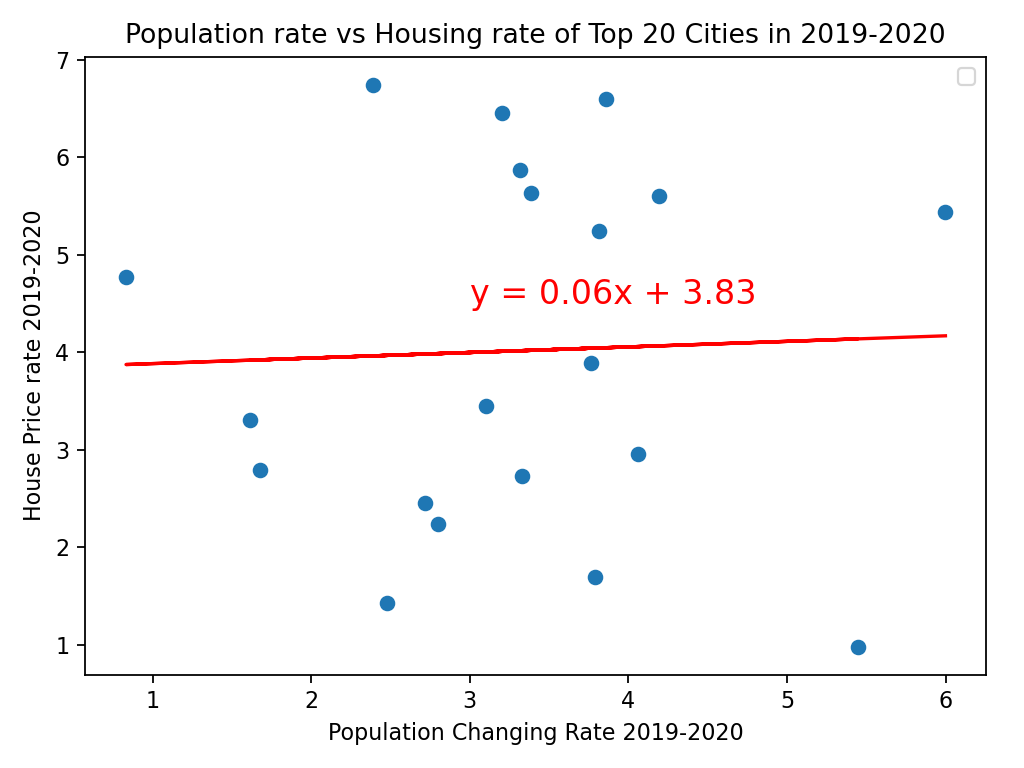

No handles with labels found to put in legend.


The r-value is: 0.0014070955699750614.
The correlation is 0.04


In [13]:
#plotting bar graph of top 20 Cities' pop rate vs housing rate in 2019-2020
%matplotlib notebook
fig, ax=plt.subplots(1)
x_values = Ptop1920["Pop2019-2020"]
y_values = Ptop1920["Housing2019-2020"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')

plt.title("Population rate vs Housing rate of Top 20 Cities in 2019-2020")
plt.xlabel("Population Changing Rate 2019-2020")
plt.ylabel("House Price rate 2019-2020")
plt.annotate(line_eq,(3,4.5), fontsize=15,color="red")
plt.tight_layout()
plt.savefig('../Output/Population rate vs Housing rate of Top 20 Cities in 2019-2020.png')
plt.legend(loc = 'best')
plt.show()


<IPython.core.display.Javascript object>


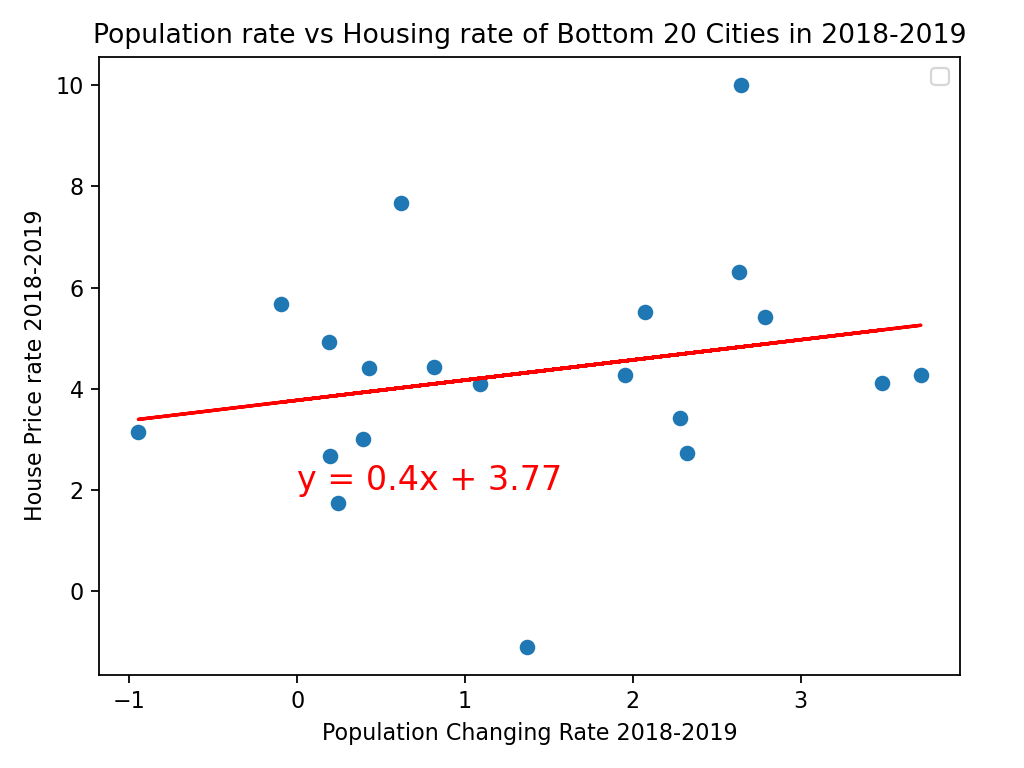

No handles with labels found to put in legend.


The r-value is: 0.05236269770807184.
The correlation is 0.23


In [15]:
#plotting bar graph of Bottom 20 Cities' pop rate vs housing rate in 2018-2019
%matplotlib notebook
fig, ax=plt.subplots(1)
x_values = Bbottom1819["Pop2018-2019"]
y_values = Bbottom1819["Housing2018-2019"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')

plt.title("Population rate vs Housing rate of Bottom 20 Cities in 2018-2019")
plt.xlabel("Population Changing Rate 2018-2019")
plt.ylabel("House Price rate 2018-2019")
plt.annotate(line_eq,(0,2), fontsize=15,color="red")
plt.tight_layout()
plt.savefig('../Output/Population rate vs Housing rate of Bottom 20 Cities in 2018-2019.png')
plt.legend(loc = 'best')
plt.show()

<IPython.core.display.Javascript object>


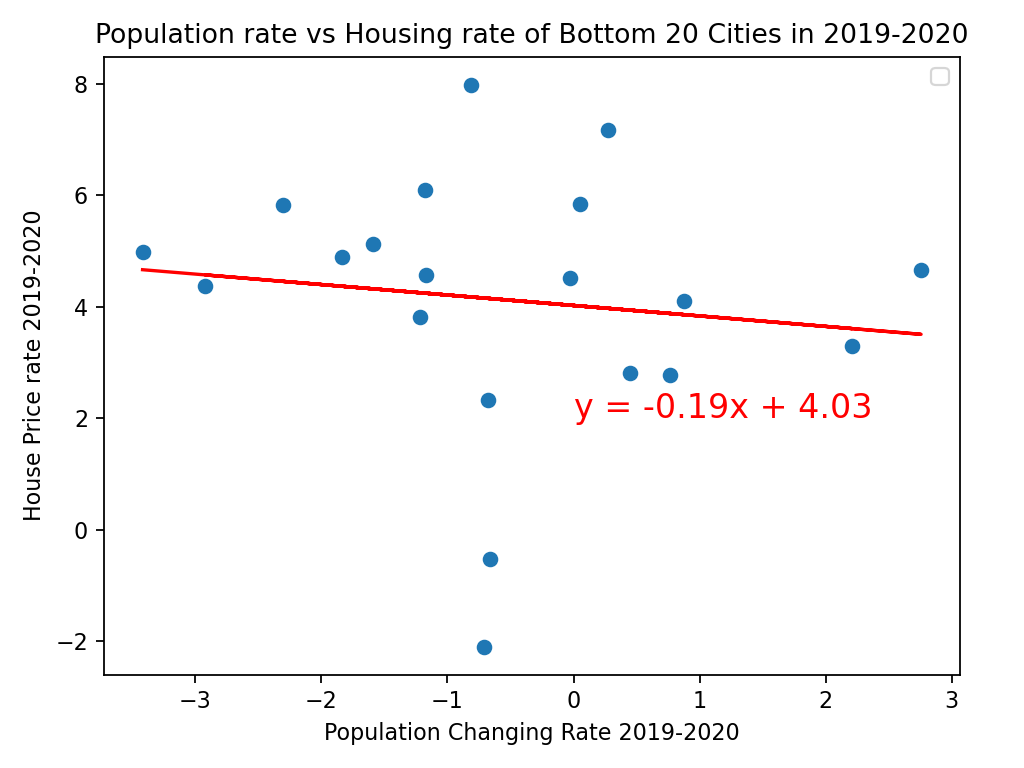

No handles with labels found to put in legend.


The r-value is: 0.015331688392490639.
The correlation is -0.12


In [16]:
#plotting bar graph of Bottom 20 Cities' pop rate vs housing rate in 2019-2020
%matplotlib notebook
fig, ax=plt.subplots(1)
x_values = Bbottom1920["Pop2019-2020"]
y_values = Bbottom1920["Housing2019-2020"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')

plt.title("Population rate vs Housing rate of Bottom 20 Cities in 2019-2020")
plt.xlabel("Population Changing Rate 2019-2020")
plt.ylabel("House Price rate 2019-2020")
plt.annotate(line_eq,(0,2), fontsize=15,color="red")
plt.tight_layout()
plt.savefig('../Output/Population rate vs Housing rate of Bottom 20 Cities in 2019-2020.png')
plt.legend(loc = 'best')
plt.show()